# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [48]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/silaswong/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


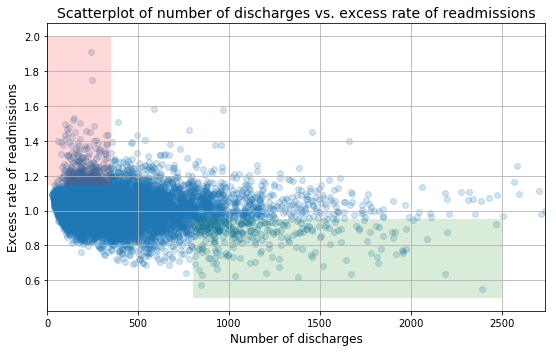

In [49]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [ ]:
# Your turn

# Part 1

The preliminary report states that there is a significant correlation between hospital capacity and readmission rates but does not back this up with any statistics for correlation.
The only statistics that the report references are the mean excess readmission rate and the percentage of hospitals with readmission rate greater than 1 for hospitals with less than 100 discharges and for hospitals with more than 1000 discharges. The report merely states these statistics without testing if any of the differences could be attributed to chance. 
The recommendation that hospitals with low capacity should be required to demonstrate upgraded resource allocation for quality care to continue operation is misguided by the premature conclusions that hospital capacity and readmission rates are correlated.

# Part 2

## Question 1

Null: hospital size (# of discharges) and excess readmission rate are independent
Alternative: hospital size and excess readmission rate are correlated

## Question 2

In [30]:
#clean data by dropping rows that did not have number of discharge data
hospital_data = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']

#access rows that had no value for the excess readmission ratio
nan_row = hospital_data[hospital_read_df['Excess Readmission Ratio'].isnull()]
len(nan_row)

/Users/silaswong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


81

In [31]:
len(hospital_data)

11578

In [36]:
#further clean data by dropping rows that did not have excess readmission ratio data
hospital_df = hospital_data[hospital_read_df['Excess Readmission Ratio'].notnull()]
len(hospital_df)
hospital_df.head()

/Users/silaswong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [43]:
#isolate discharge and ratio into separate arrays
hospital_discharge = np.array(hospital_df['Number of Discharges'])
hospital_ratio = np.array(hospital_df['Excess Readmission Ratio'])

In [52]:
def pearson_r(x,y):
    cor_mat = np.corrcoef(x,y)
    
    return cor_mat[0,1]

In [61]:
#convert discharge data from string to integer
hospital_discharge = hospital_discharge.astype('int')
hospital_discharge

array([ 242,  247,  586, ..., 1379,  843, 2393])

In [63]:
#calculate observed correlation between discharge and excess readmission ratio
r_obs = pearson_r(hospital_discharge,hospital_ratio)
r_obs

-0.097397943510793547

In [64]:
#permute order of discharge data to force independence between discharge and ratio data
perm_replicates = np.empty(10000)
for i in range(10000):
    hospital_discharge_permuted = np.random.permutation(hospital_discharge)
    perm_replicates[i] = pearson_r(hospital_discharge_permuted,hospital_ratio)

In [66]:
#calculate p value
p_value = np.sum(perm_replicates < r_obs) / len(perm_replicates)
p_value

0.0

## Question 3

The p value is significant at the .01 significance level.

## Question 4

I assumed that hospital size and excess readmission ratio were independent. After running 10,000 correlation replicates under this assumption, there were no replicates that had a magnitude that was greater than the observed correlation. Therefore, there is evidence to refute the null that hospital size and excess readmission ratio are correlated. 

That said, the correlation observed was -.097. Practically speaking, it would not be prudent to recommend that smaller hospitals must upgrade resource allocation before continuing operation given the weak correlation between size and excess readmission ratio. Further analysis of the correlation of other variables against excess readmission ratio should be conducted before recommending such drastic recommendations.

## Question 5

Advantages: you are able to see all of the data at once
Disadvantage: it is hard to spot trends in the data

In [148]:
hospital_df['Number of Discharges'] = hospital_df['Number of Discharges'].astype(int)
import seaborn as sns
import matplotlib.pyplot as plt

In [169]:
hospital_df['Bins']= pd.cut(hospital_df['Number of Discharges'],(0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000))

In [170]:
hospital_df.head()

,index,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Discharge Bin,Bins
0,1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013,,"(0, 500]"
1,1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013,,"(0, 500]"
2,1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013,,"(0, 500]"
3,1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013,,"(0, 500]"
4,1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013,,"(0, 500]"


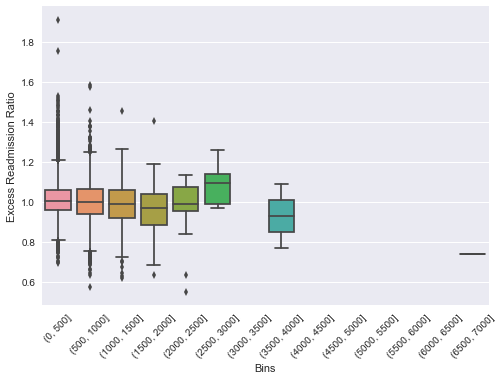

In [171]:
sns.boxplot(y='Excess Readmission Ratio',x='Bins',data=hospital_df)
plt.xticks(rotation=45)
plt.show()